
![](https://hsto.org/files/256/a5d/ed0/256a5ded03274e0f87ccf97164c31c35.png)


# Регрессия - моя профессия


Задача, где надо спрогнозировать непрерывную переменную называется регрессией. Пример непрерывной переменной: цена на квартиры. Именно её прогнозированием мы сегодня и займёмся. Поехали!


## 1. Предобработка данных 

Начнём наш крестовый поход за дешёвой недвижимостью с предобработки данных. 

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import pandas as pd               # уже знакомый вам пакет для работы с таблицами
import numpy as np                # смутно знакомый вам пакет для работы с матрицами
import matplotlib.pyplot as plt   # уже знакомый вам пакет для картинок 
import seaborn as sns             # ещё один пакет для картинок 

%matplotlib inline

In [20]:
df = pd.read_csv('./boston_data.csv', sep=',')  # подгружаем табличку 
print('Размер выборки:', df.shape)                          # смотрим на её размеры 
df.head( 10) # Смотрим что лежит в табличке 

Размер выборки: (404, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
5,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39,34.9
6,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
7,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90,21.6
8,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69,14.1
9,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0


__Описание переменных:__

```
crim – уровень преступности на душу населения по городам 
zn – доля жилой земли, зонированной на участки площадью более 25 000 кв.футов
indus – доля акров, не связанных с розничной торговлей, на город
chas - Фиктивная переменная Чарльз-Ривер (= 1, если тракт ограничивает реку; 0 в противном случае)
nox – концентрация оксидов азота (частей на 10 миллионов)
rm – среднее количество комнат в жилом помещении
age – доля квартир, занятых владельцами, построенных до 1940 года
dis – взвешенные расстояния до пяти бостонских центров занятости
rad - индекс доступности к радиальным магистралям
tax – ставка налога на недвижимость с полной стоимостью за 10 000 долларов
ptratio – соотношение учеников и учителей в разбивке по городам
black - 1000(Bk - 0,63)^2, где Bk - доля чернокожих по городам
lstat - % бедных среди населения
medv - Средняя стоимость домов, занятых владельцами, в 1000 долларов (целевая переменная)
```
Какие переменный категориальные? Какие непрерывные?
Переменные zn, chas - категориальные, остальные - непрерывные

In [21]:
print(df.info()) # Посмотрим на информацию по типам переменных 
print(df.describe()) # Статистические характеристики

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB
None
             crim          zn       indus        chas         nox         rm  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.00000   
mean     3.730912   10.509901   11.189901    0.069307    0.556710    6.30145   


In [22]:
df.isnull().sum()  # посмотрим на то есть ли в переменных пропуски

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Пропусков нет. Это хорошая новость. А что делать, если бы они были? Вспоминайте, что мы делали в прошлый раз с Титаником! 

Посмотрим как выглядит распределение цен. 

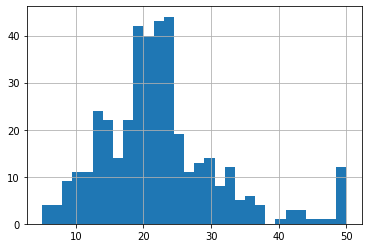

In [23]:
df.medv.hist(bins=30);

У распределения цен есть проблема - очень длинный хвост. В выборке встречаются квартиры с довольно большой стоимостью. Такие наблюдения называются выбросами. С ними нужно бороться, иначе наша модель подстроится под них. Давайте сгладим распределение цен, прологарифмировав его. Так довольно часто поступают с целевой переменной. 

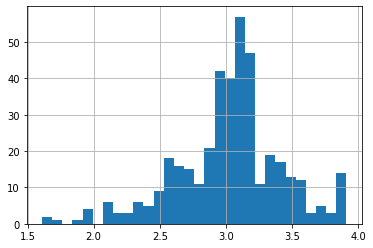

In [24]:
df['medv'] = np.log(df['medv'])
df.medv.hist(bins=30);

Посмотрим на рспределение всех остальных признаков. Давайте обсудим, что интересного видно на картинках!

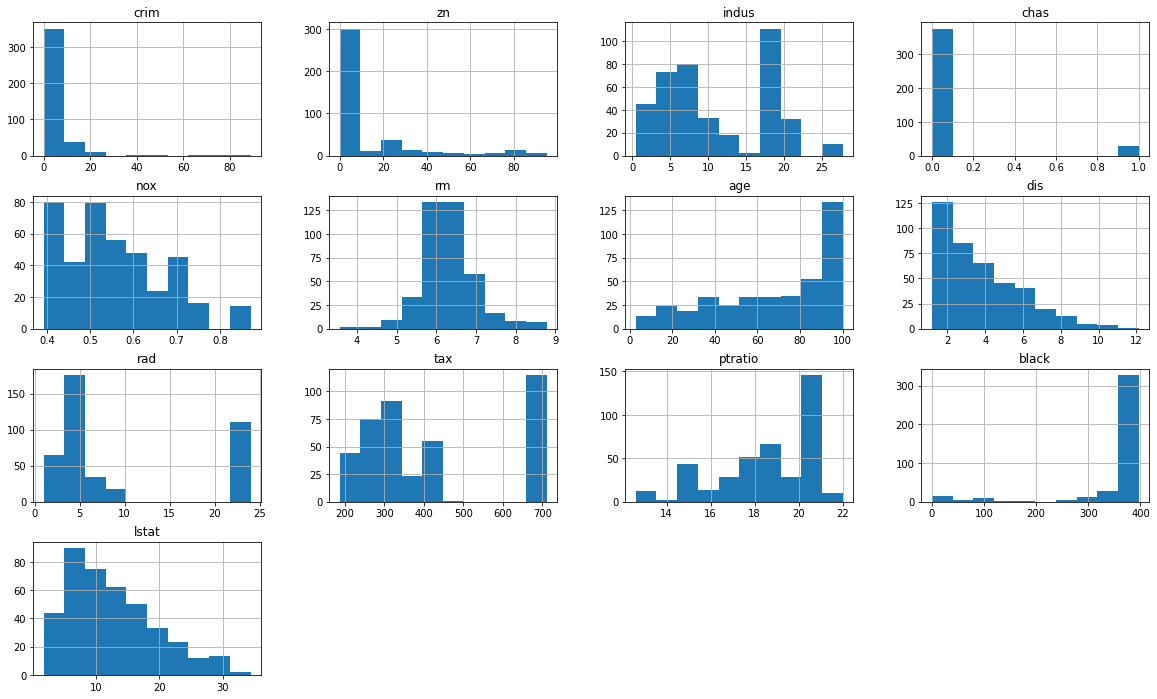

In [25]:
df.drop('medv',axis=1).hist(figsize=(20, 12));

Кроме гистограммок имеет смысл взглянуть на матрицу корреляций. Что видно на ней? 

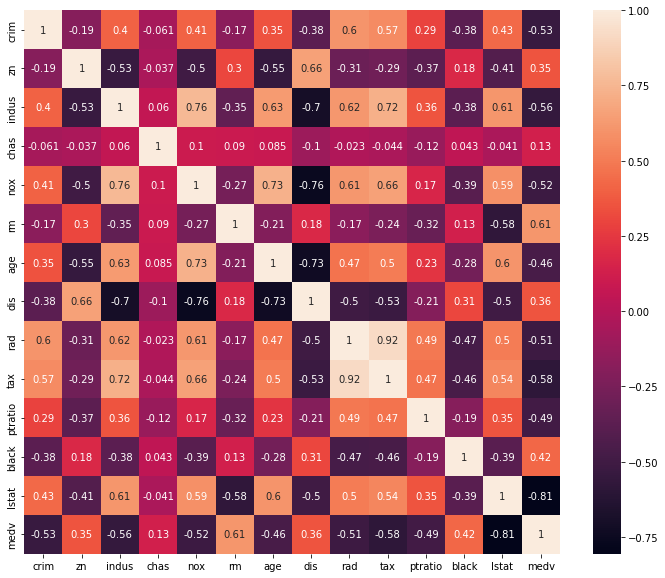

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True);

Ещё давайте посмотрим на облака рассеивания и успокоимся с картинками. 

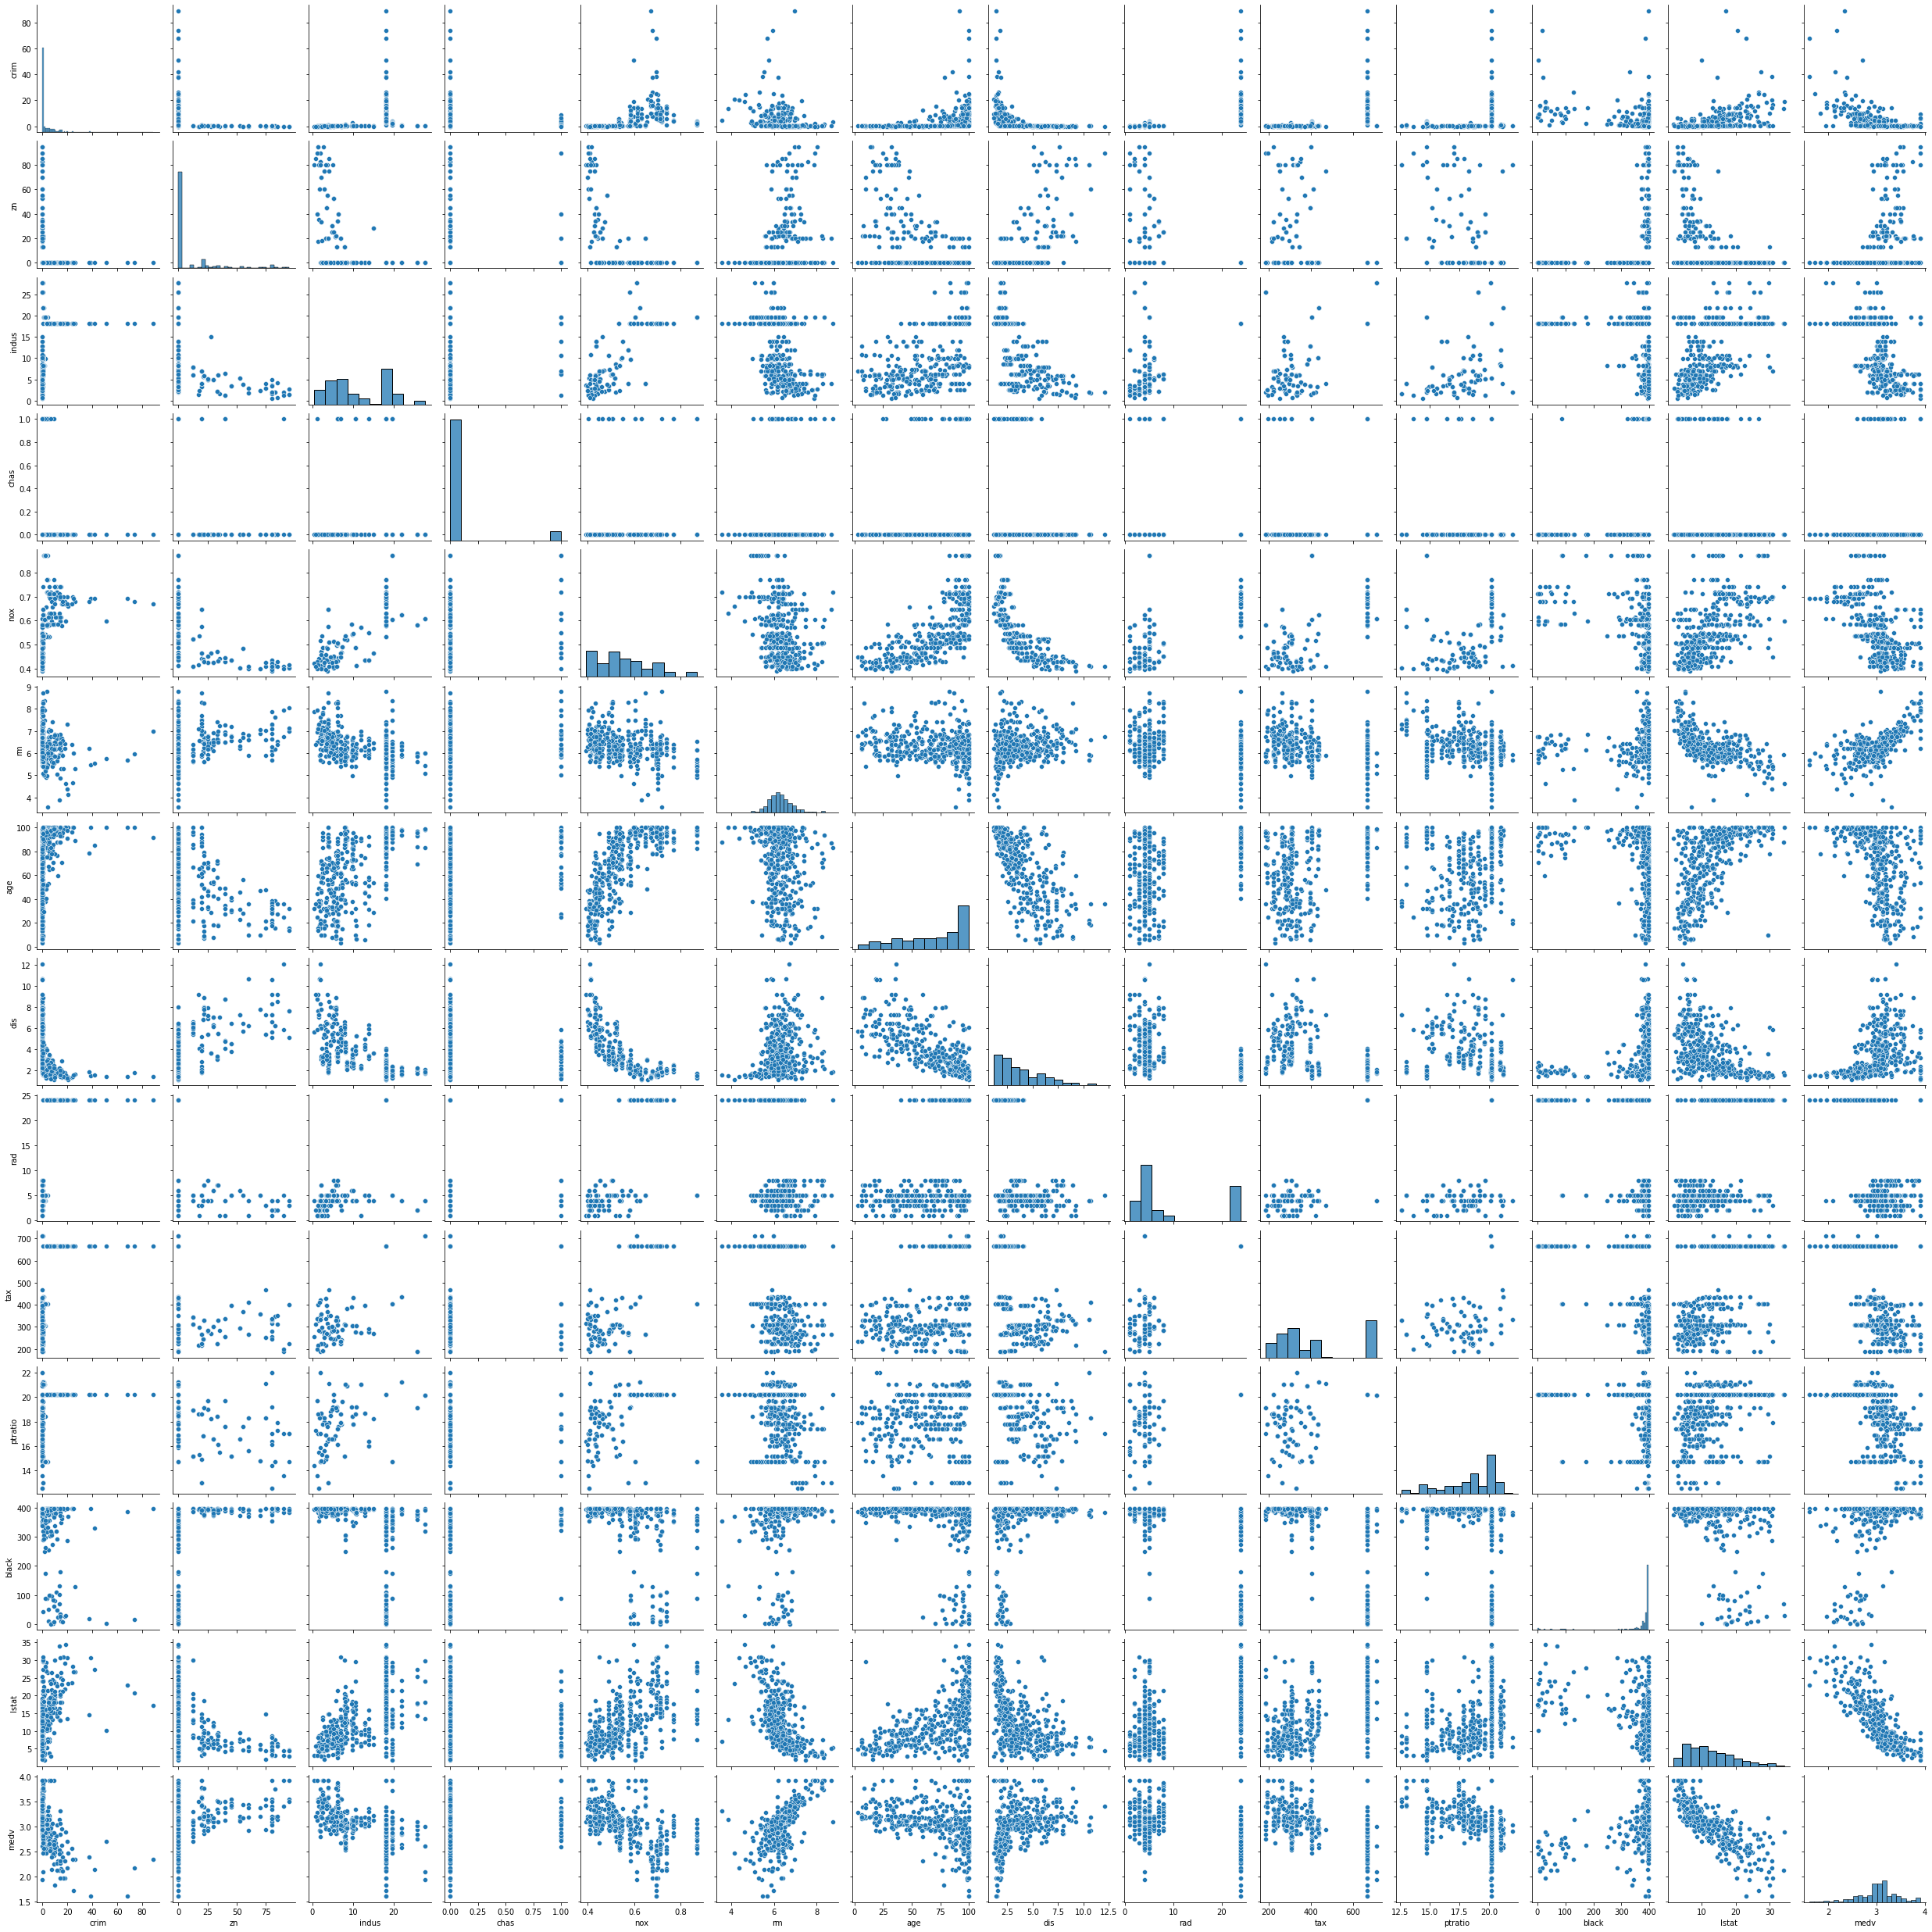

In [27]:
sns.pairplot(df)

Теперь распределение выглядит более приятно. 

Займёмся предобработкой категориальных переменных при помощи одного горячего кодирования (One Hot Encoding). При таком преобразовании категориальной переменной мы создаем столько новых столбцов, сколько различных значений этой переменной у нас было. Обычно, при этом, первый столбец убирается, чтобы не создавать линейно-зависимых столбцов. Например, если у переменной `"погода"` есть три состояния `"хорошая"`, `"средняя"` и `"нормальная"`, то после `OneHotEncoding` мы получим три столбца, где значения будут либо нулями, либо единицами, в зависимости от того, какая погода была в этом наблюдении.

## Важно
`OneHotEncoding` в общем случае тоже может привнести информацию о тестовой выборке в тренировочную в том случае, если в категориальном столбце в отложенной выборке могут содержаться новые значения. Если такая вероятность есть, то как и с другими методами препроцессинга, `OneHotEncoding` нужно обучать на трейне и использовать на тесте. 

В остальных случаях, можно воспользоваться удобной оберткой в `pandas` - `pd.get_dummies()`

In [28]:
# Сделали OHE для категориальной переменной
df_categor = pd.get_dummies(df[['zn','chas']],columns=['zn','chas'], drop_first=True)

# Объединили назад наши таблички
df = pd.concat([df.drop(['zn','chas'],axis=1),df_categor], axis=1)
df.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,...,zn_55.0,zn_60.0,zn_70.0,zn_75.0,zn_80.0,zn_82.5,zn_85.0,zn_90.0,zn_95.0,chas_1.0
0,0.15876,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,...,0,0,0,0,0,0,0,0,0,0
1,0.10328,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,...,0,0,0,0,0,0,0,0,0,0
2,0.34940,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,...,0,0,0,0,0,0,0,0,0,0
3,2.73397,19.58,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,...,0,0,0,0,0,0,0,0,0,0
4,0.04337,5.64,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,...,0,0,0,0,0,0,0,0,0,0


Делим данные на тренировочные и тестовые! $30\%$ данных откладываем для тестирования качества модели. Остальные $70\%$ берём для обучения. 

In [29]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

Последний предобрабатывательский штрих это скалирование (стандартизация непрерывных переменных). Давайте вспомним зачем его делают. Обычно, когда обучают модель, хотят минимизировать ошибку, которую она допускает. Чаще всего эту функцию минимизируют численно. Если переменные измерены в разных шкалах (что-то в тоннах, что-то в годах и тд), алгоритм может при обучении заблудиться. Хорошо бы направить его и подтолкнуть в нужном направлении. Таким толчком является стандартизация переменных. 

Из каждой переменной вычетают среднее и делят на стандартное отклонение. Это очищает переменные от своих уникальных шкал и упрощает путь алгоритма к оптимальной точке. Обычно стандартное отклонение и среднее для скалирования оценивают на обучающей выборке. К тестовой применяют уже оценённый результат. Это позволяет не подглядывать в тестовую часть и не улучшать за счёт этого подглядывания прогнозы. Подглядывать - нечестно! 

In [30]:
from sklearn.preprocessing import StandardScaler

# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(df_train[['crim', 'indus', 'nox', 'rm', 'age','dis','rad','tax','ptratio','black','lstat']]) 

StandardScaler()

In [31]:
# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(df_train[['crim', 'indus', 'nox', 'rm', 'age','dis','rad','tax','ptratio','black','lstat']])

# Применяем скалирвощик к тесту 
df_test_scale = scaler.transform(df_test[['crim', 'indus', 'nox', 'rm', 'age','dis','rad','tax','ptratio','black','lstat']])

In [32]:
# Заменяем значения на отскалированные
df_train[['crim', 'indus', 'nox', 'rm', 'age','dis','rad','tax','ptratio','black','lstat']] = df_train_scale
df_test[['crim', 'indus', 'nox', 'rm', 'age','dis','rad','tax','ptratio','black','lstat']] = df_test_scale

Все непрерывные переменные теперь выглядят проскалированными :) 

In [33]:
df_train.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,...,zn_55.0,zn_60.0,zn_70.0,zn_75.0,zn_80.0,zn_82.5,zn_85.0,zn_90.0,zn_95.0,chas_1.0
165,-0.007725,0.968818,1.788511,0.128238,0.753462,-0.575295,1.544442,1.427239,0.812252,0.383257,...,0,0,0,0,0,0,0,0,0,1
258,1.571389,0.968818,0.301811,-2.515756,1.073836,-1.027802,1.544442,1.427239,0.812252,-3.579822,...,0,0,0,0,0,0,0,0,0,0
312,0.087549,0.968818,1.298673,0.322759,0.593274,-0.608307,1.544442,1.427239,0.812252,-3.337917,...,0,0,0,0,0,0,0,0,0,0
89,1.013174,0.968818,0.593995,-3.660439,1.073836,-1.048399,1.544442,1.427239,0.812252,-2.457961,...,0,0,0,0,0,0,0,0,0,0
362,-0.409251,-1.195351,-0.875519,-0.247338,-1.339654,1.026959,-0.694801,0.064969,-0.749810,0.134356,...,0,0,0,0,0,0,0,0,0,0


In [34]:
print(df_train.shape) # Посмотрим на размеры трэйна и теста 
print(df_test.shape)  

(282, 37)
(122, 37)


In [35]:
# Вытаскиваем цены и параметры квартир по разным переменным для удобства 

y_train = df_train.medv 
y_test = df_test.medv 

X_train = df_train.drop('medv', axis=1)
X_test = df_test.drop('medv', axis=1)

## 2. Константный прогноз 

Шаг первый. Построим константный прогноз. Будем говорить, что стоимость любой квартиры равна среднему значению. Это самый глупый прогноз, который мы можем сделать. Мы будм сравнивать с ним прогнозы более сложных моделей. 

In [36]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([3.00791689, 3.00791689, 3.00791689, 3.00791689, 3.00791689])

## 3. Метрики качества для регрессии 

Мы сделали выше прогноз. Теперь мы хотим понять насколько он хороший. Для этого обычно используют метрики. Посмотрим на несколько таких метрик. 

In [37]:
from sklearn import metrics  # подгружаем метрики

Первой метрикой, с которой мы познакомимся, будет MAE (mean absolute error), средняя абсолютная ошибка. Она вычисляется следующим образом: 

$$ MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|. $$

Если мы спрогнозировали, что квартира стоит 20 рублей, а она стоила 10 рублей, мы ошиблись на |10 - 20| = 10 рублей. Средняя абсолютная ошибка - это средняя сумма рублей, на которую мы облажались. 

In [38]:
metrics.mean_absolute_error(y_test, y_pred_naive)

0.2802397263962329

Напомню, что мы прогнозируем логарифм цены, нам так удобнее. Ошибка выше считается в логарифмах. Если мы хотим посмотреть на ошибку в долларах, надо взять экспоненту от цен. Ниже мы можем увидеть, что в среднем ошибаемся на тридцать с лишним тысяч долларов. 

In [39]:
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

6.224056354522078

Второй метрикой является MSE (mean squared error), средняя квадратичная ошибка. Она вычисляется как 

$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2.$$

Смысл этой ошибки в том, чтобы штрафовать за большие ошибки сильнее, чем за маленькие. Если мы ошиблись на 5 долларов, то в ошибку войдёт 25. Если мы ошиблись на 10 долларов, то в ошибку войдёт 100. Чем выше ошибка, тем сильнее штраф. 

In [40]:
metrics.mean_squared_error(y_test, y_pred_naive)

0.13248115850714634

По аналогии перейдём к долларам. 

In [41]:
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

75.72243738496236

Получилось многовато, не находите? Всё дело в том, что это не просто доллары, это квадратные доллары. Мы же суммировали квадраты. Неплохо было бы вернутся к обычным долларам. Для этого надо взять из MSE квадратный корень. Тогда получится новая ошибка, RMSE. 

In [42]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive)))

8.701864017839073

Так как более большие ошибки входят с более большим весом, вполне логично, что RMSE получилось больше, чем MAE. 

Часто для нас принципиальным является не то, на сколько денег мы ошиблись, а то на сколько процентов мы ошиблись. Метрика, которая отлавливает процентную ошибку, называется MAPE (mean absolute percentage error), средняя абсолютная процентная ошибка. 

$$
MAPE = \frac{1}{n} \sum_{i=1}^n \frac{|y_i - \hat{y}_i|}{y_i}
$$

Она часто применяется в следующих задачах: например, вы прогнозируете спрос, и вам принципиально, на сколько процентов вы ошиблись, а не абсолютное значение. Если вы предсказали  один, а в реальности было  десять - это не то же самое, что вы предсказали  тысяча, а в реальности было  тысяча  девять. С точки зрения МАЕ или MSE, это две совершенно одинаковые ошибки. А если вас интересует, сколько в среднем на сколько процентов вы ошибаетесь, то это отражает МАРЕ.

Её нам придётся реальзовать самостоятельно. Благо, это не очень трудно. 

In [43]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)

9.328973658427595



Последняя метрика, с которой нам нужно познакомиться, это коэффициент детерминации, $R^2$. Он отражает то, какую долю дисперсии объясняемой переменной мы объяснили с помощью нашей модели:

$$ R^2 =1- \frac{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \bar{y}_i)^2} $$

Эту метрику очень сильно любят консалтеры и аудиторы, потому что только её они и знают. На самом деле в ней нет ничего хорошего. При добавлении в модель новых переменных она всегда растёт. У неё есть ещё несколько тонких математических недостатков, о которых вы можете узнать из книг. 

In [44]:
metrics.r2_score(y_test, y_pred_naive)

-0.033716443767429105

Закинем все метрики в одну общую функцию, чтобы было удобно их печатать. 

In [45]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [46]:
print_metrics(y_test, y_pred_naive)

MAE: 6.224056354522078
RMSE: 8.701864017839073
R2: -0.033716443767429105
MAPE: 9.328973658427595


## 3. Строим нашу первую регрессию!

Пришло время построить линейную регрессию! Эта модель говорит, что цена на квартиру формируется в результате суммирования тех характеристик, которыми она обладает с какими-то весами

$$\hat{y} = \beta_0 + \beta_1 x_1 + ... \beta_n x_n.$$

Например, если мы оценили модель и у нас получилось, что 

$$ price = 10000 + 20 \cdot totsp,$$

то это означает, что средняя стоимость квартиры равна 10 тыс. долларам. При этом каждый дополнительный метр общей площади квартиры делает её дороже на 20 рублей. 

Для того, чтобы обучить регрессию минимизируют одну из метрик, перечисленных в прошлом разделе. В базовой комплектации регрессии это делают с MSE. Такая модель обладает огромным количеством няшных статистических свойств. 

In [47]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

Посмотрим на качество прогнозов. Мы стали ошибаться меньше, чем раньше. 

In [48]:
print_metrics(y_test,y_pred_regr)

MAE: 2.7260290453781977
RMSE: 3.836149000089794
R2: 0.820027486810916
MAPE: 3.9648323983956693


Посмотрим на то, какие признаки вносят в цену наибольший вклад. 

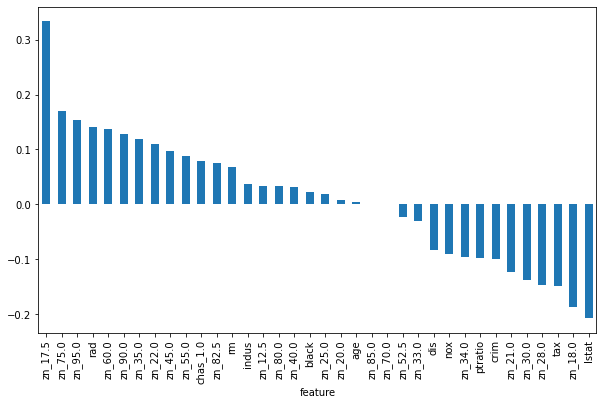

In [49]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

## 4. Строим Lasso-регрессию 

Построим более сложную модель, LASSO-регрейссию. Фишка этой модели в том, что она зануляет лишние коэффиценты. 

In [50]:
from sklearn.linear_model import Lasso

# Объявили модель
model_simplelasso = Lasso()

# Обучили модель на тренировочной выборке 
model_simplelasso.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_lasso = model_simplelasso.predict(X_test)

Посмотрим на важность факторов для стоимости квартиры. 

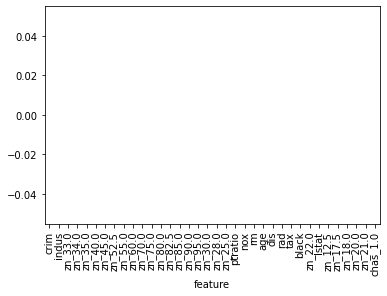

In [51]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": model_simplelasso.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar');

In [52]:
print_metrics(y_test,y_pred_lasso)

MAE: 6.224056354522078
RMSE: 8.701864017839073
R2: -0.033716443767429105
MAPE: 9.328973658427595


Важных факторов нет, всё занулилось. Метрики качества такие же, как при константном прогнозе. Почему такое произошло? Дело в том, что у модели есть гиперпараметр - сила зануления. И его нужно подбирать методом перебора. В нашей модели он стоял слишком большим. Давайте попробуем подобрать этот параметр. 

## 5. Подбор гиперпараметра для Lasso-регрессии

Будем делать перебор следующим способом: дробим тренировочную выборку на пять частей. На четырёх учим модель, на пятой прогнозируем. Смотрим на качество. И так по очереди выделяем для прогноза каждую из 5 частичек. Потом качество прогноза усредняем - кросс-валидация. Для какого параметра из решётки качетство получится наибольшим, тот мы и оставим. 

In [53]:
from sklearn.model_selection import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


При параметре 0.001 качество у прогнозов получилось самым хорошим. Его и берём. Посмотрим на важность переменных

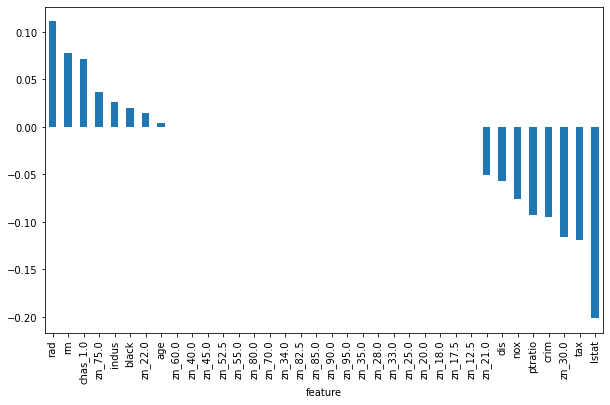

In [54]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

И на качество модели. Оно оказывается близким к обычной регрессии. Судя по всему у нас в выборке нет лишних переменных и занулять нечего. 

In [55]:
print_metrics(y_test,y_pred_lasso)

MAE: 2.779893229290043
RMSE: 3.93868522524577
R2: 0.8079678526777427
MAPE: 4.065185761796982


In [56]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)

# Сделали прогнозы
y_pred_lasso_cv = lasso_cv.predict(X_test)

Лучшее значение параметра: 0.0007206836549985536


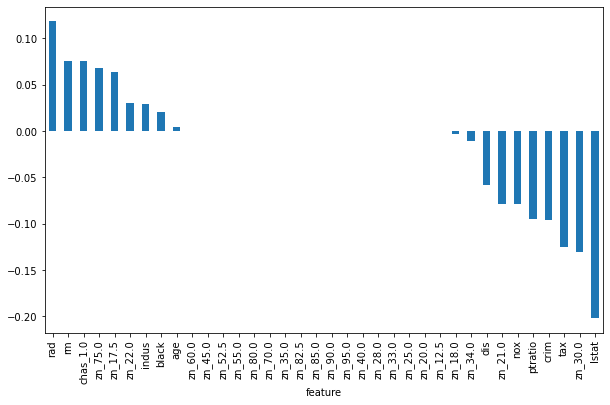

In [57]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": lasso_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [58]:
print_metrics(y_test, y_pred_lasso_cv)

MAE: 2.79067254661803
RMSE: 3.94489458816883
R2: 0.8076678773570138
MAPE: 4.074642657771107
